To apply a Laplacian filter on a color image in the HSI color space, we first need to convert the image from RGB to HSI color space. Here are the steps:
<br>
1. Convert the image from RGB to HSI color space using the following equations:
    <br>
    Hue, H = arccos[0.5*((R-G)+(R-B))/sqrt((R-G)^2+(R-B)*(G-B))]
    <br>
    <br>if B <= G, H = 360 - H
    <br><br>
    Saturation, S = 1 - 3*(min(R,G,B))/(R+G+B)
    <br><br>
    Intensity, I = (R+G+B)/3
    <br><br>
    
    Where R, G, and B are the red, green, and blue channels of the input image.
<br>
2. Apply the Laplacian filter on the intensity channel I using a convolution operation. The Laplacian filter can be defined as:
<br>
| 0  1  0 |<br>
| 1 -4  1 |<br>
| 0  1  0 |<br>
<br>
This filter calculates the second derivative of the image and is commonly used for edge detection.

3. Convert the filtered image back to RGB color space using the following equations:
    <br><br>Channel Red, R = I + ((I * (1 - S)) * cos(H_rad)) / cos(theta)
    <br><br>Channel Green, G = I + ((I * (1 - S)) * cos(H_rad - 2 * pi / 3)) / cos(theta)
    <br><br>Channel Blue, B = I + ((I * (1 - S)) * cos(H_rad + 2 * pi / 3)) / cos(theta)

<br><br>
Where H, S, and I are the hue, saturation, and intensity channels of the filtered image.


In [1]:
import numpy as np
from PIL import Image, ImageChops
import matplotlib.pyplot as plt

In [2]:
def rgb_to_hsi(img):
    # Convert RGB image to HSI color space
    img = np.array(img, dtype=np.float32) / 255.0
    R, G, B = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    
    num = 0.5 * ((R - G) + (R - B))
    den = np.sqrt((R - G)**2 + (R - B)*(G - B))
    H = np.arccos(num / (den + 1e-10))

    H = np.where(B > G, 2*np.pi - H, H)

    S = 1 - 3 * np.minimum(R, np.minimum(G, B)) / (R + G + B + 1e-10)
    
    I = (R + G + B) / 3
    
    return np.stack((H, S, I), axis=2)

In [3]:
def hsi_to_rgb(img):
    # Convert HSI image to RGB color space
    H, S, I = img[:, :, 0], img[:, :, 1], img[:, :, 2]

    R, G, B = np.zeros_like(H), np.zeros_like(H), np.zeros_like(H)
    H_rad = H * 2 * np.pi / 360
    theta = np.radians(60) - H_rad

    # Compute RGB values
    R = I + ((I * (1 - S)) * np.cos(H_rad)) / np.cos(theta)
    G = I + ((I * (1 - S)) * np.cos(H_rad - 2 * np.pi / 3)) / np.cos(theta)
    B = I + ((I * (1 - S)) * np.cos(H_rad + 2 * np.pi / 3)) / np.cos(theta)

    return np.clip(np.stack((R, G, B), axis=2), 0, 1)


In [4]:
def laplacian_filter(img,kernel):
    # Apply Laplacian filter on intensity channel
    I = img[:, :, 2]
    I_filtered = np.zeros_like(I)
    for i in range(1, I.shape[0]-1):
        for j in range(1, I.shape[1]-1):
            # Compute the filtered value for the current pixel
            filtered_value = 0
            for k in range(-1, 2):
                for l in range(-1, 2):
                    pixel_value = I[i+k, j+l]
                    filter_weight = kernel[k+1][l+1]
                    filtered_value += pixel_value * filter_weight
            I_filtered[i, j] = filtered_value
            
    img[:, :, 2] = I_filtered
    return img


In [5]:
def main(image_path):
    # Load image
    img = np.array(Image.open(image_path))

    # Convert RGB to HSI
    img_hsi = rgb_to_hsi(img)

    # Define the Laplacian filter kernel
    kernel = [[0, 1, 0],
              [1, -4, 1],
              [0, 1, 0]]

    # Apply Laplacian filter on intensity channel
    img_hsi_filtered = laplacian_filter(img_hsi,kernel)

    # Convert HSI to RGB
    img_filtered = hsi_to_rgb(img_hsi_filtered)

    # Save filtered image
    result = Image.fromarray((img_filtered * 255).astype(np.uint8))
    return result

In [6]:
result  = main("image.jpeg")

In [7]:
result1= main("color.png")

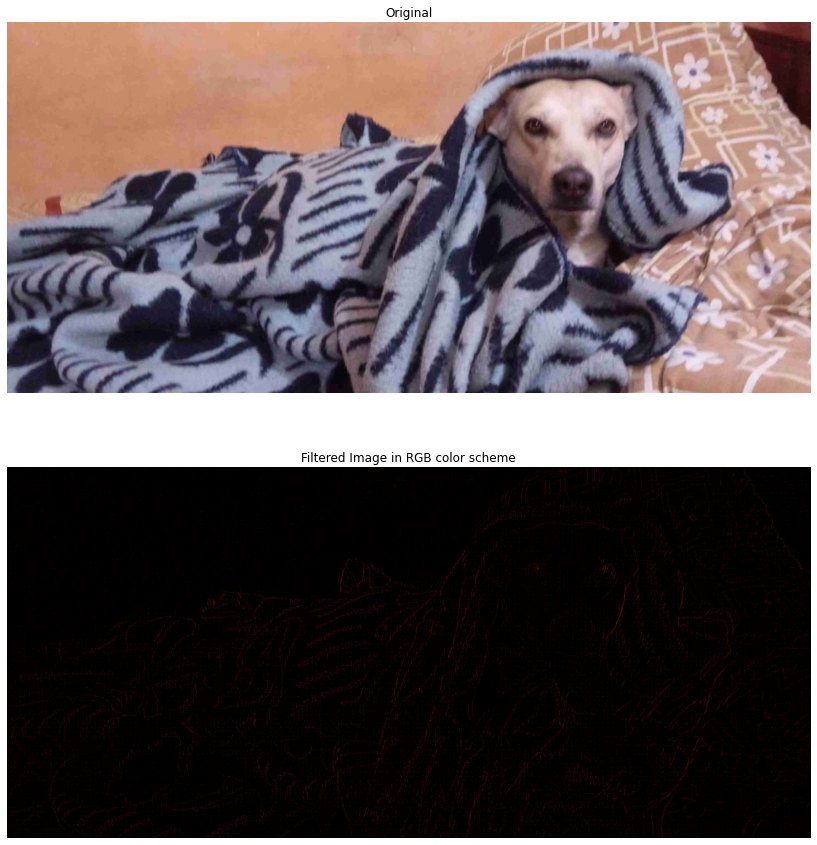

In [8]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
plt.imshow(Image.open("image.jpeg"),cmap="gray")
plt.axis("off")
plt.title("Original")
plt.subplot(2,1,2)
plt.imshow(result,cmap="gray")
plt.axis("off")
plt.title("Filtered Image in RGB color scheme")
plt.show()

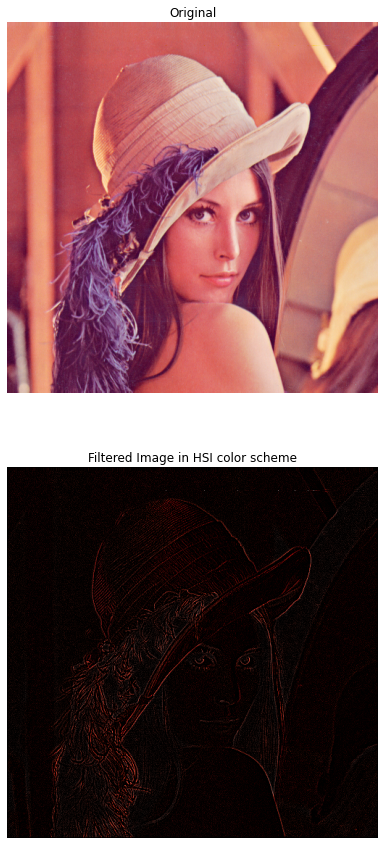

In [9]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
plt.imshow(Image.open("color.png"),cmap="gray")
plt.axis("off")
plt.title("Original")
plt.subplot(2,1,2)
plt.imshow(result1,cmap="gray")
plt.axis("off")
plt.title("Filtered Image in HSI color scheme")
plt.show()

In [10]:
rgb = Image.open("rgb1.jpeg")

In [13]:
x = ImageChops.subtract(result,rgb)

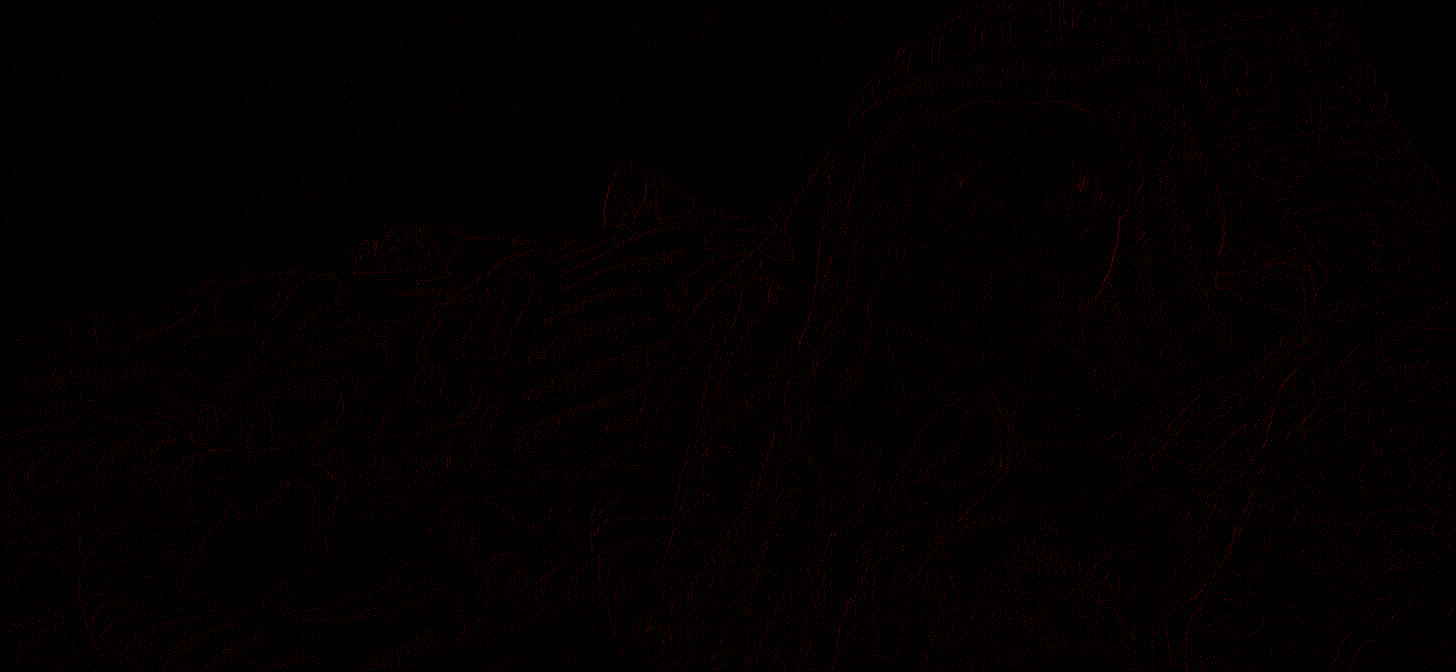

In [14]:
x